In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
import warnings 

plt.rcParams['figure.figsize']= (10,5)
plt.rcParams['figure.dpi']= 250

warnings.filterwarnings('ignore')

sns.set_theme(style='darkgrid',palette='viridis')

%matplotlib inline

In [2]:
df_books = pd.read_csv('Books (3).csv', encoding='latin-1')
df_books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [3]:
df_ratings=pd.read_csv('Ratings (2).csv',encoding='latin-1')
df_ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [4]:
df_users=pd.read_csv('Users (2).csv',encoding='latin-1')
df_users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [5]:
# Data cleaning

In [6]:
# Changing column names in users dataset 

In [7]:
df_users.rename(columns={'Location': 'user_location', 'Age': 'user_age'}, inplace=True)

df_users.head()

,User-ID,user_location,user_age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [8]:
# Shape of datasets 

In [9]:
print(df_ratings.shape)
print(df_users.shape)
print(df_books.shape)

(1149780, 3)
(278858, 3)
(271360, 8)


In [10]:
df_books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

In [11]:
# droping images column 

In [12]:
df_books.drop(['Image-URL-S','Image-URL-M'], axis=1, inplace=True)

In [13]:
df_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [14]:
# Let's check the Data Types

In [15]:
df_books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-L            object
dtype: object

In [16]:
df_ratings.dtypes

User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object

In [17]:
df_users.dtypes

User-ID            int64
user_location     object
user_age         float64
dtype: object

In [18]:
df_books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [19]:
# Year-Of-Publication has integers and strings

In [20]:
df_books.loc[df_books['Year-Of-Publication'] == 'DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,NaN


In [21]:
df_books.loc[df_books.ISBN == '078946697X','Year-Of-Publication'] = 2000
df_books.loc[df_books.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum"
df_books.loc[df_books.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"

In [22]:
df_books.loc[df_books.ISBN == '0789466953', 'Year-Of-Publication'] = 2000
df_books.loc[df_books.ISBN == '0789466953', 'Book-Author'] = "James Buckley"
df_books.loc[df_books.ISBN == '0789466953', 'Publisher'] = "DK Publishing Inc"

In [23]:
df_books.loc[df_books['Year-Of-Publication'] == 'Gallimard']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,NaN


In [24]:
df_books.loc[df_books.ISBN == '2070426769','Year-Of-Publication'] = 2003
df_books.loc[df_books.ISBN == '2070426769','Book-Author'] = 'Jean-Marie Gustave Le Clezio'
df_books.loc[df_books.ISBN == '2070426769','Publisher'] = 'Gallimard'

In [25]:
df_books['Year-Of-Publication'] = pd.to_numeric(df_books['Year-Of-Publication'])

In [26]:
sorted(df_books['Year-Of-Publication'].unique())

[0,
 1376,
 1378,
 1806,
 1897,
 1900,
 1901,
 1902,
 1904,
 1906,
 1908,
 1909,
 1910,
 1911,
 1914,
 1917,
 1919,
 1920,
 1921,
 1922,
 1923,
 1924,
 1925,
 1926,
 1927,
 1928,
 1929,
 1930,
 1931,
 1932,
 1933,
 1934,
 1935,
 1936,
 1937,
 1938,
 1939,
 1940,
 1941,
 1942,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2008,
 2010,
 2011,
 2012,
 2020,
 2021,
 2024,
 2026,
 2030,
 2037,
 2038,
 2050]

In [27]:
df_books.loc[df_books['Year-Of-Publication'] == 0,:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
176,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag GmbH",http://images.amazon.com/images/P/3150000335.0...
188,342311360X,Die Liebe in Den Zelten,Gabriel Garcia Marquez,0,Deutscher Taschenbuch Verlag (DTV),http://images.amazon.com/images/P/342311360X.0...
288,0571197639,Poisonwood Bible Edition Uk,Barbara Kingsolver,0,Faber Faber Inc,http://images.amazon.com/images/P/0571197639.0...
351,3596214629,"Herr Der Fliegen (Fiction, Poetry and Drama)",Golding,0,Fischer Taschenbuch Verlag GmbH,http://images.amazon.com/images/P/3596214629.0...
542,8845229041,Biblioteca Universale Rizzoli: Sulla Sponda De...,P Coelho,0,Fabbri - RCS Libri,http://images.amazon.com/images/P/8845229041.0...
...,...,...,...,...,...,...
270794,014029953X,Foe (Essential.penguin S.),J.M. Coetzee,0,Penguin Books Ltd,http://images.amazon.com/images/P/014029953X.0...
270913,0340571187,Postmens House,Maggie Hemingway,0,Trafalgar Square,http://images.amazon.com/images/P/0340571187.0...
271094,8427201079,El Misterio De Sittaford,Agatha Christie,0,Editorial Molino,http://images.amazon.com/images/P/8427201079.0...
271182,0887781721,Tom Penny,Tony German,0,P. Martin Associates,http://images.amazon.com/images/P/0887781721.0...


In [28]:
# There are a lot of books with Year-Of-Publication == 0

In [29]:
df_books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication     int64
Publisher              object
Image-URL-L            object
dtype: object

In [30]:
df_ratings.dtypes

User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object

In [31]:
df_users.dtypes

User-ID            int64
user_location     object
user_age         float64
dtype: object

In [32]:
df_books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-L            3
dtype: int64

In [33]:
df_books[df_books['Book-Author'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...


In [34]:
df_books.loc[df_books.ISBN == '9627982032','Book-Author'] = "Larissa Anne Downes"

In [35]:
df_books[df_books['Publisher'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...


In [36]:
df_books.loc[df_books.ISBN == '193169656X','Publisher'] = "NovelBooks,inc"
df_books.loc[df_books.ISBN == '1931696993','Publisher'] = "CreateSpace Independent Publishing Platform"

In [37]:
df_books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-L            3
dtype: int64

In [38]:
df_ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [39]:
df_users.isnull().sum()

User-ID               0
user_location         0
user_age         110762
dtype: int64

In [40]:
df_users[df_users['user_age'].isnull()] #there are 2.7 lakh users in that 1.1 lakh ages are null

,User-ID,user_location,user_age
0,1,"nyc, new york, usa",NaN
2,3,"moscow, yukon territory, russia",NaN
4,5,"farnborough, hants, united kingdom",NaN
6,7,"washington, dc, usa",NaN
7,8,"timmins, ontario, canada",NaN
...,...,...,...
278849,278850,"sergnano, lombardia, italy",NaN
278853,278854,"portland, oregon, usa",NaN
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


<Axes: >

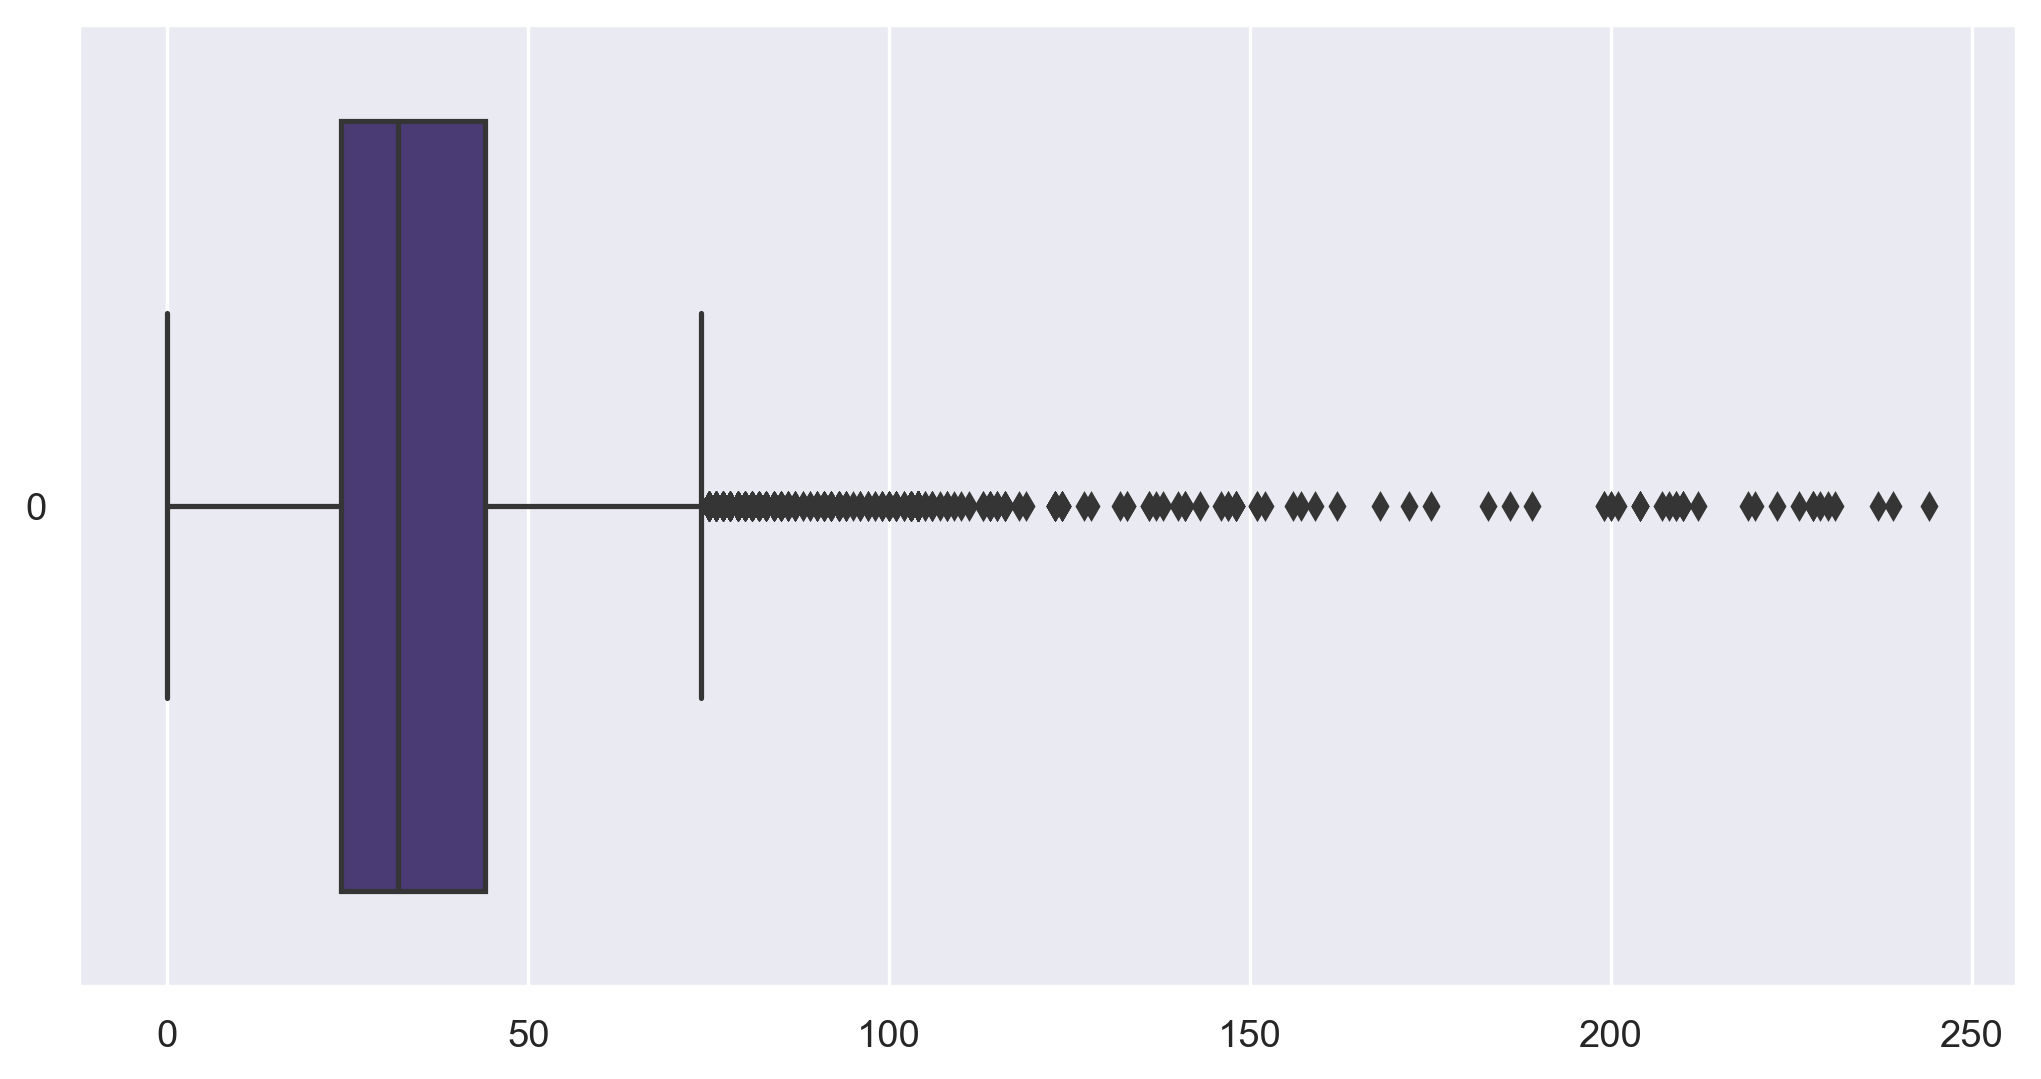

In [41]:
sns.boxplot(df_users['user_age'],orient='h') #there are lots of outliers 

In [42]:
def missing_values(df):
    mis_val=df.isnull().sum()
    mis_val_percent=round(df.isnull().mean().mul(100),2)
    mz_table=pd.concat([mis_val,mis_val_percent],axis=1)
    mz_table=mz_table.rename(
    columns={df.index.name:'col_name',0:'Missing Values',1:'% of Total Values'})
    mz_table['Data_type']=df.dtypes
    mz_table=mz_table.sort_values('% of Total Values',ascending=False)
    return mz_table.reset_index()

In [43]:
missing_values(df_users) #39% missing values in age column

,index,Missing Values,% of Total Values,Data_type
0,user_age,110762,39.72,float64
1,User-ID,0,0.00,int64
2,user_location,0,0.00,object


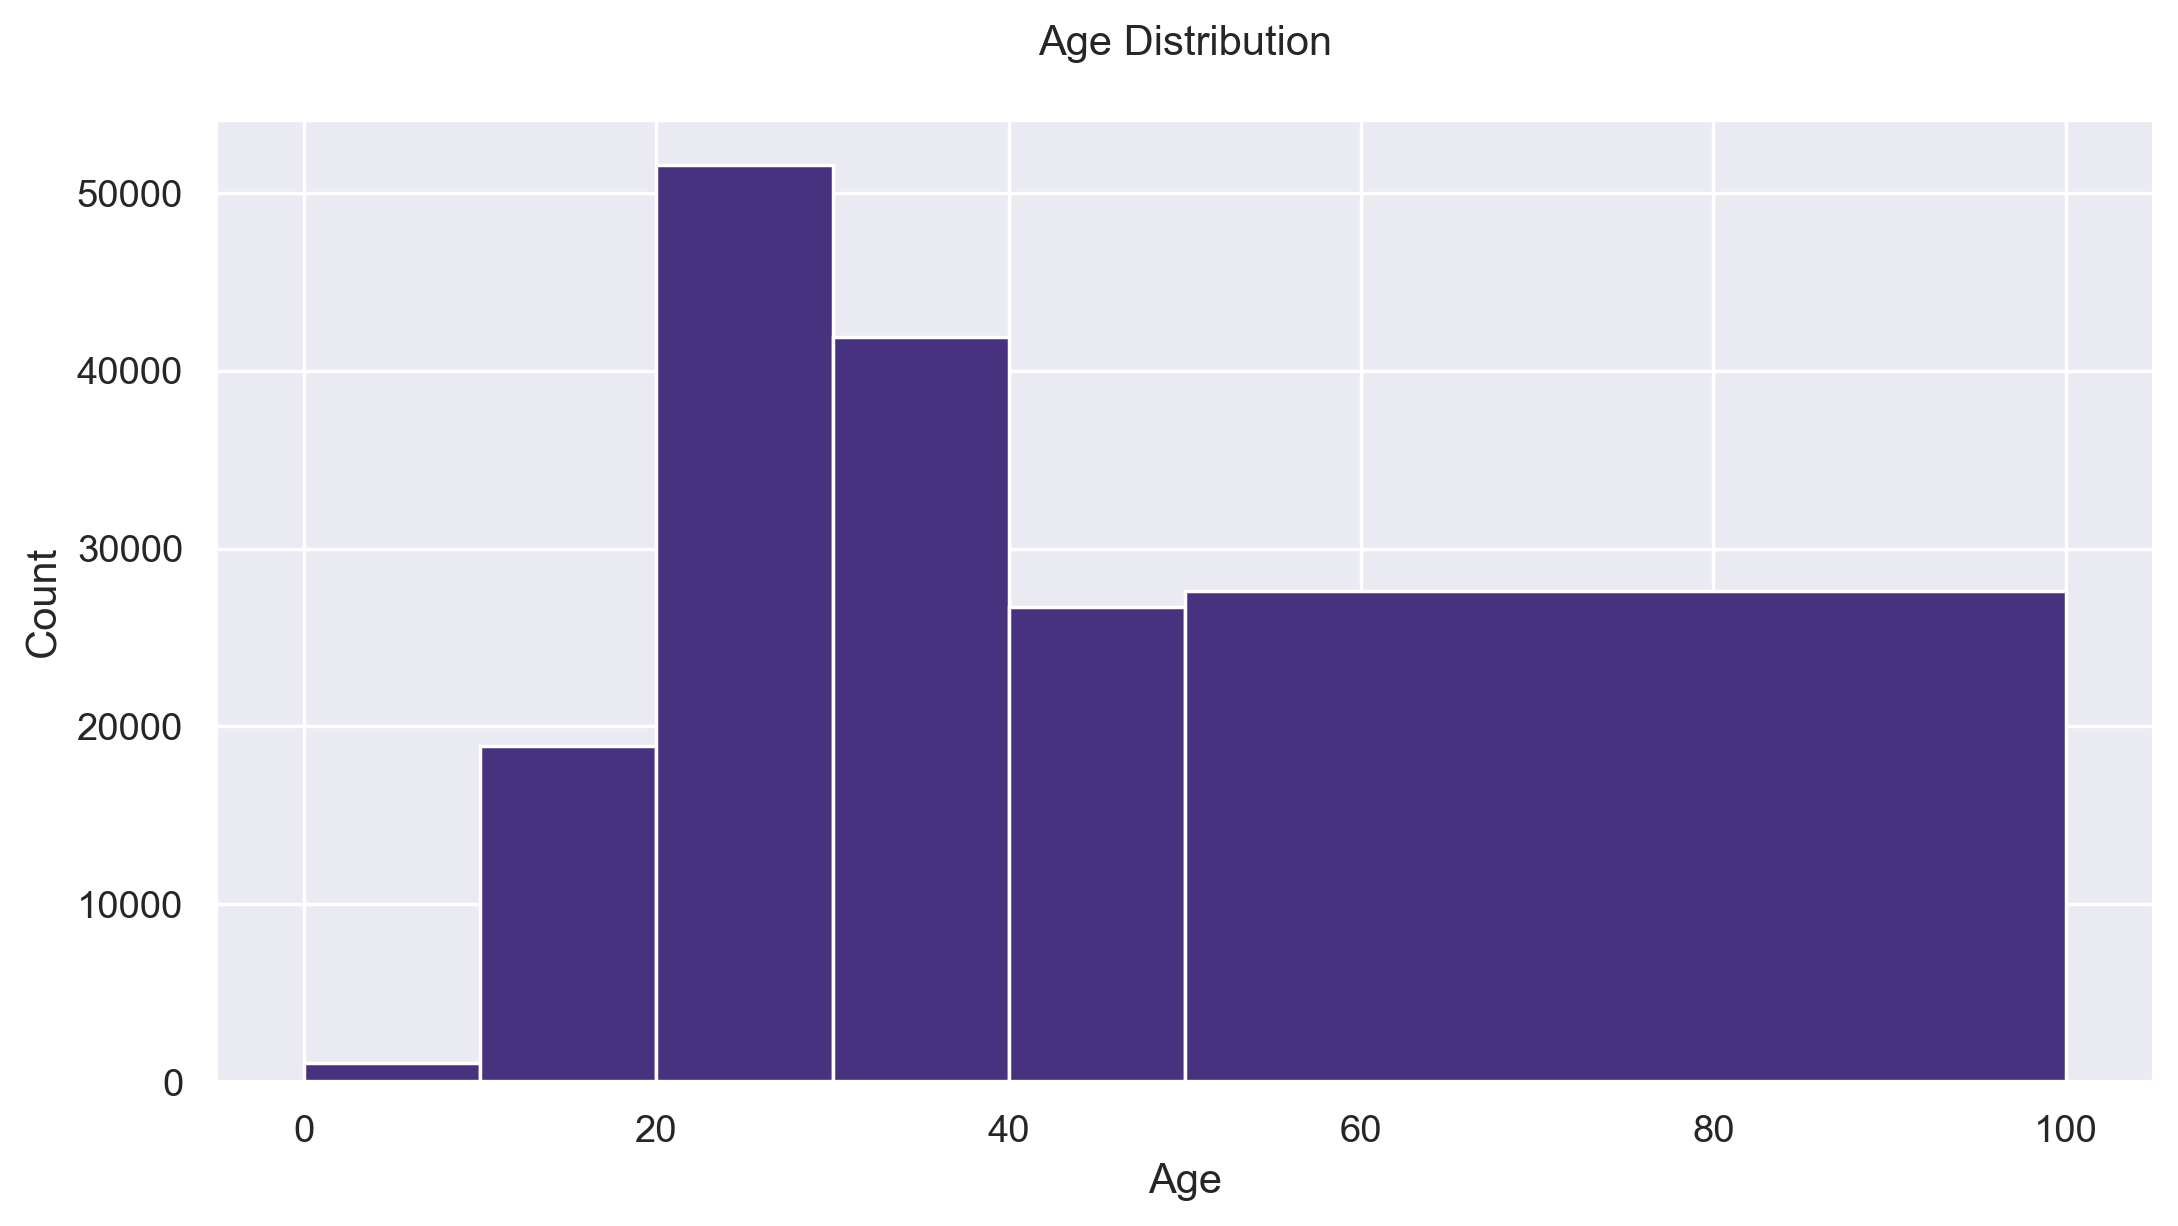

In [44]:
df_users.user_age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [45]:
#The most active users are among those in their 20–30s.

In [46]:
print(sorted(df_users.user_age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

In [47]:
#Let's find our unique value in user_location column

In [48]:
df_users.user_location.unique()

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

In [49]:
df_users.user_location.nunique()

57339

In [50]:
#57339 unique Value it's really hard to understand
#So lets create column 'Country'

In [51]:
for i in df_users:
    df_users['user_country']=df_users.user_location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$') 

In [52]:
df_users.user_country.nunique()

529

In [53]:
#drop user_location column
df_users.drop('user_location',axis=1,inplace=True)

In [54]:
df_users.head(2)

,User-ID,user_age,user_country
0,1,NaN,usa
1,2,18.0,usa


In [55]:
df_users.isnull().sum()

User-ID              0
user_age        110762
user_country       368
dtype: int64

In [56]:
df_users.dtypes

User-ID           int64
user_age        float64
user_country     object
dtype: object

In [57]:
df_users['user_country']=df_users['user_country'].astype('str')

In [58]:
a=list(df_users.user_country.unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['', '01776', '02458', '19104', '23232', '30064', '85021', '87510', '_ brasil', 'a', 'aaa', 'adsgfdr', 'afghanistan', 'ahrensburg', 'alachua', 'albania', 'alderney', 'algeria', 'algérie', 'allen', 'ama lurra', 'america', 'american samoa', 'andorra', 'angola', 'antarctica', 'aotearoa', 'argentina', 'armenia', 'aroostook', 'aruba', 'asturies', 'auckland', 'austbritania', 'australia', 'australii', 'austria', 'autralia', 'az', 'azerbaijan', 'bademn würtemberg', 'bahamas', 'bahrain', 'baltimore', 'bangladesh', 'barbados', 'basilicata', 'basque country', 'bavaria', 'baxter', 'bbbzzzzz', 'belarus', 'belgi', 'belgique', 'belgium', 'belize', 'bell', 'benin', 'berguedà', 'bermuda', 'bernalillo', 'bfe', 'bhutan', 'bih', 'bkk', 'bladen', 'bolivia', 'bosnia', 'botswana', 'brasil', 'brazil', 'brunei', 'brunei darussalam', 'bucks', 'bulgaria', 'buncombe', 'burkina faso', 'burkinafasu', 'burlington', 'burma', 'butler', 'c', 'cadd0', 'calabria', 'california', 'cambodia', 'camden', 'cameroon', 'can', 'c

In [59]:
#lots of data has Misspellings Let's correct it.

In [60]:
df_users['user_country'].replace(['','01776','02458','19104','23232','30064','85021','87510','alachua','america','autralia','cananda','geermany','italia','united kindgonm','united sates','united staes','united state','united states','us'],
                           ['unknown','usa','usa','usa','usa','usa','usa','usa','usa','usa','australia','canada','germany','italy','uk','usa','usa','usa','usa','usa'],inplace=True)

In [61]:
a=list(df_users.user_country.unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['_ brasil', 'a', 'aaa', 'adsgfdr', 'afghanistan', 'ahrensburg', 'albania', 'alderney', 'algeria', 'algérie', 'allen', 'ama lurra', 'american samoa', 'andorra', 'angola', 'antarctica', 'aotearoa', 'argentina', 'armenia', 'aroostook', 'aruba', 'asturies', 'auckland', 'austbritania', 'australia', 'australii', 'austria', 'az', 'azerbaijan', 'bademn würtemberg', 'bahamas', 'bahrain', 'baltimore', 'bangladesh', 'barbados', 'basilicata', 'basque country', 'bavaria', 'baxter', 'bbbzzzzz', 'belarus', 'belgi', 'belgique', 'belgium', 'belize', 'bell', 'benin', 'berguedà', 'bermuda', 'bernalillo', 'bfe', 'bhutan', 'bih', 'bkk', 'bladen', 'bolivia', 'bosnia', 'botswana', 'brasil', 'brazil', 'brunei', 'brunei darussalam', 'bucks', 'bulgaria', 'buncombe', 'burkina faso', 'burkinafasu', 'burlington', 'burma', 'butler', 'c', 'cadd0', 'calabria', 'california', 'cambodia', 'camden', 'cameroon', 'can', 'canada', 'canada eh', 'canda', 'cape may', 'cape town', 'cape verde', 'caribbean sea', 'carter', 'cass

In [62]:
df_users['user_country'].replace(['_ brasil','ahrensburg','australii','bademn würtemberg','belgique','brunei darussalam','burkinafasu','canada eh','canda','cape may','cape town'],
                                 ['brazil','germany','australia','germany','belgium','brunei','burkina faso','canada','canada','usa','south africa'],inplace=True)

In [63]:
a=list(df_users.user_country.unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['a', 'aaa', 'adsgfdr', 'afghanistan', 'albania', 'alderney', 'algeria', 'algérie', 'allen', 'ama lurra', 'american samoa', 'andorra', 'angola', 'antarctica', 'aotearoa', 'argentina', 'armenia', 'aroostook', 'aruba', 'asturies', 'auckland', 'austbritania', 'australia', 'austria', 'az', 'azerbaijan', 'bahamas', 'bahrain', 'baltimore', 'bangladesh', 'barbados', 'basilicata', 'basque country', 'bavaria', 'baxter', 'bbbzzzzz', 'belarus', 'belgi', 'belgium', 'belize', 'bell', 'benin', 'berguedà', 'bermuda', 'bernalillo', 'bfe', 'bhutan', 'bih', 'bkk', 'bladen', 'bolivia', 'bosnia', 'botswana', 'brasil', 'brazil', 'brunei', 'bucks', 'bulgaria', 'buncombe', 'burkina faso', 'burlington', 'burma', 'butler', 'c', 'cadd0', 'calabria', 'california', 'cambodia', 'camden', 'cameroon', 'can', 'canada', 'cape verde', 'caribbean sea', 'carter', 'cass', 'catalonia', 'catalunya', 'catalunya spain', 'cayman islands', 'chad', 'channel islands', 'cherokee', 'chian', 'chile', 'china', 'china öð¹ú', 'chinaöð¹

In [64]:
df_users['user_country'].replace(['brasil','aotearoa','asturies','baltimore','basilicata','belgi','bernalillo','bladen','california','china öð¹ú','chinaöð¹ú','cnina','deutsches reich','deutschland','effingham'],
                                 ['brazil','new zealand','asturias','usa','italy','belgium','usa','usa','usa','china','china','china','germany','germany','usa'],inplace=True)

In [65]:
a=list(df_users.user_country.unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['a', 'aaa', 'adsgfdr', 'afghanistan', 'albania', 'alderney', 'algeria', 'algérie', 'allen', 'ama lurra', 'american samoa', 'andorra', 'angola', 'antarctica', 'argentina', 'armenia', 'aroostook', 'aruba', 'asturias', 'auckland', 'austbritania', 'australia', 'austria', 'az', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados', 'basque country', 'bavaria', 'baxter', 'bbbzzzzz', 'belarus', 'belgium', 'belize', 'bell', 'benin', 'berguedà', 'bermuda', 'bfe', 'bhutan', 'bih', 'bkk', 'bolivia', 'bosnia', 'botswana', 'brazil', 'brunei', 'bucks', 'bulgaria', 'buncombe', 'burkina faso', 'burlington', 'burma', 'butler', 'c', 'cadd0', 'calabria', 'cambodia', 'camden', 'cameroon', 'can', 'canada', 'cape verde', 'caribbean sea', 'carter', 'cass', 'catalonia', 'catalunya', 'catalunya spain', 'cayman islands', 'chad', 'channel islands', 'cherokee', 'chian', 'chile', 'china', 'clackamas', 'clinton', 'cn', 'collin', 'colombia', 'comoros', 'congo', 'cook', 'copenhagen', 'costa rica', 'country', 

In [66]:
df_users['user_country'].replace(['england','england uk','europa','euskadi','euskal herria','españa','fifi','germay','hongkong','houston','il canada','in','indiai','isreal','italien','itlay','k1c7b1'],
                                 ['uk','uk','europe','basque country','basque country','spain','fiji','germany','hong kong','usa','canada','india','india','israel','italy','italy','canada'],inplace=True)

In [67]:
a=list(df_users.user_country.unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['a', 'aaa', 'adsgfdr', 'afghanistan', 'albania', 'alderney', 'algeria', 'algérie', 'allen', 'ama lurra', 'american samoa', 'andorra', 'angola', 'antarctica', 'argentina', 'armenia', 'aroostook', 'aruba', 'asturias', 'auckland', 'austbritania', 'australia', 'austria', 'az', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados', 'basque country', 'bavaria', 'baxter', 'bbbzzzzz', 'belarus', 'belgium', 'belize', 'bell', 'benin', 'berguedà', 'bermuda', 'bfe', 'bhutan', 'bih', 'bkk', 'bolivia', 'bosnia', 'botswana', 'brazil', 'brunei', 'bucks', 'bulgaria', 'buncombe', 'burkina faso', 'burlington', 'burma', 'butler', 'c', 'cadd0', 'calabria', 'cambodia', 'camden', 'cameroon', 'can', 'canada', 'cape verde', 'caribbean sea', 'carter', 'cass', 'catalonia', 'catalunya', 'catalunya spain', 'cayman islands', 'chad', 'channel islands', 'cherokee', 'chian', 'chile', 'china', 'clackamas', 'clinton', 'cn', 'collin', 'colombia', 'comoros', 'congo', 'cook', 'copenhagen', 'costa rica', 'country', 

In [68]:
df_users['user_country'].replace(['ksa','la argentina','la belgique','la france','la suisse','la svizzera','le canada','le madagascar','lecce','Liaoning','lleida','london','malaysian','maracopa','maroc','missouri','monterrey','moçambique','mérida','méxico','nederlands','new london','newzealand','north carolina','northern ireland','nyc','nyhamnsläge','nz','oakland','ohio','palm beach','perãº','philippine','philippinies','phillipines','phippines','phila','phils','phippines','pinallas','polska','queensland','russian federation','saint luica','san bernardino','san franicsco','san mateo','santa barbara','sardegna','saudia arabia','sicilia','slovak republik','slo','srilanka','suisse','swaziland','swazilandia','texas','thailoand','the netherlands','the philippines','turkei','türkiye','u k','ukrain','unite states','united kindgdom','united kingdom','united statea','united stated','urugua','uusa','van wert','ventura','vicenza','wales','west yorkshire','wonderful usa','worcester','yanhill','zhengjiang'],
                                 ['saudi arabia','argentina','belgium','france','switzerland','switzerland','canada','madagascar','italy','china','spain','uk','malaysia','maricopa','morocco','usa','mexico','mozambique','mexico','mexico','netherlands','usa','new zealand','usa','uk','usa','sweden','new zealand','usa','usa','usa','peru','philippines','philippines','philippines','philippines','philippines','philippines','philippines','pinellas county','poland','australian','russia','saint lucia','usa','usa','usa','usa','sardinia','saudi arabia','sicily','slovakia','slovakia','sri lanka','switzerland','eswatini','eswatini','usa','thailand','netherlands','philippines','turkey','turkey','uk','ukraine','usa','uk','uk','usa','usa','uruguay','usa','usa','ventura county','italy','uk','uk','usa','worcester','usa','china'],inplace=True)

In [69]:
a=list(df_users.user_country.unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['a', 'aaa', 'adsgfdr', 'afghanistan', 'albania', 'alderney', 'algeria', 'algérie', 'allen', 'ama lurra', 'american samoa', 'andorra', 'angola', 'antarctica', 'argentina', 'armenia', 'aroostook', 'aruba', 'asturias', 'auckland', 'austbritania', 'australia', 'australian', 'austria', 'az', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados', 'basque country', 'bavaria', 'baxter', 'bbbzzzzz', 'belarus', 'belgium', 'belize', 'bell', 'benin', 'berguedà', 'bermuda', 'bfe', 'bhutan', 'bih', 'bkk', 'bolivia', 'bosnia', 'botswana', 'brazil', 'brunei', 'bucks', 'bulgaria', 'buncombe', 'burkina faso', 'burlington', 'burma', 'butler', 'c', 'cadd0', 'calabria', 'cambodia', 'camden', 'cameroon', 'can', 'canada', 'cape verde', 'caribbean sea', 'carter', 'cass', 'catalonia', 'catalunya', 'catalunya spain', 'cayman islands', 'chad', 'channel islands', 'cherokee', 'chian', 'chile', 'china', 'clackamas', 'clinton', 'cn', 'collin', 'colombia', 'comoros', 'congo', 'cook', 'copenhagen', 'costa rica

In [70]:
df_users.user_country.nunique()

394

Text(0.5, 1.0, 'Count of users Country wise')

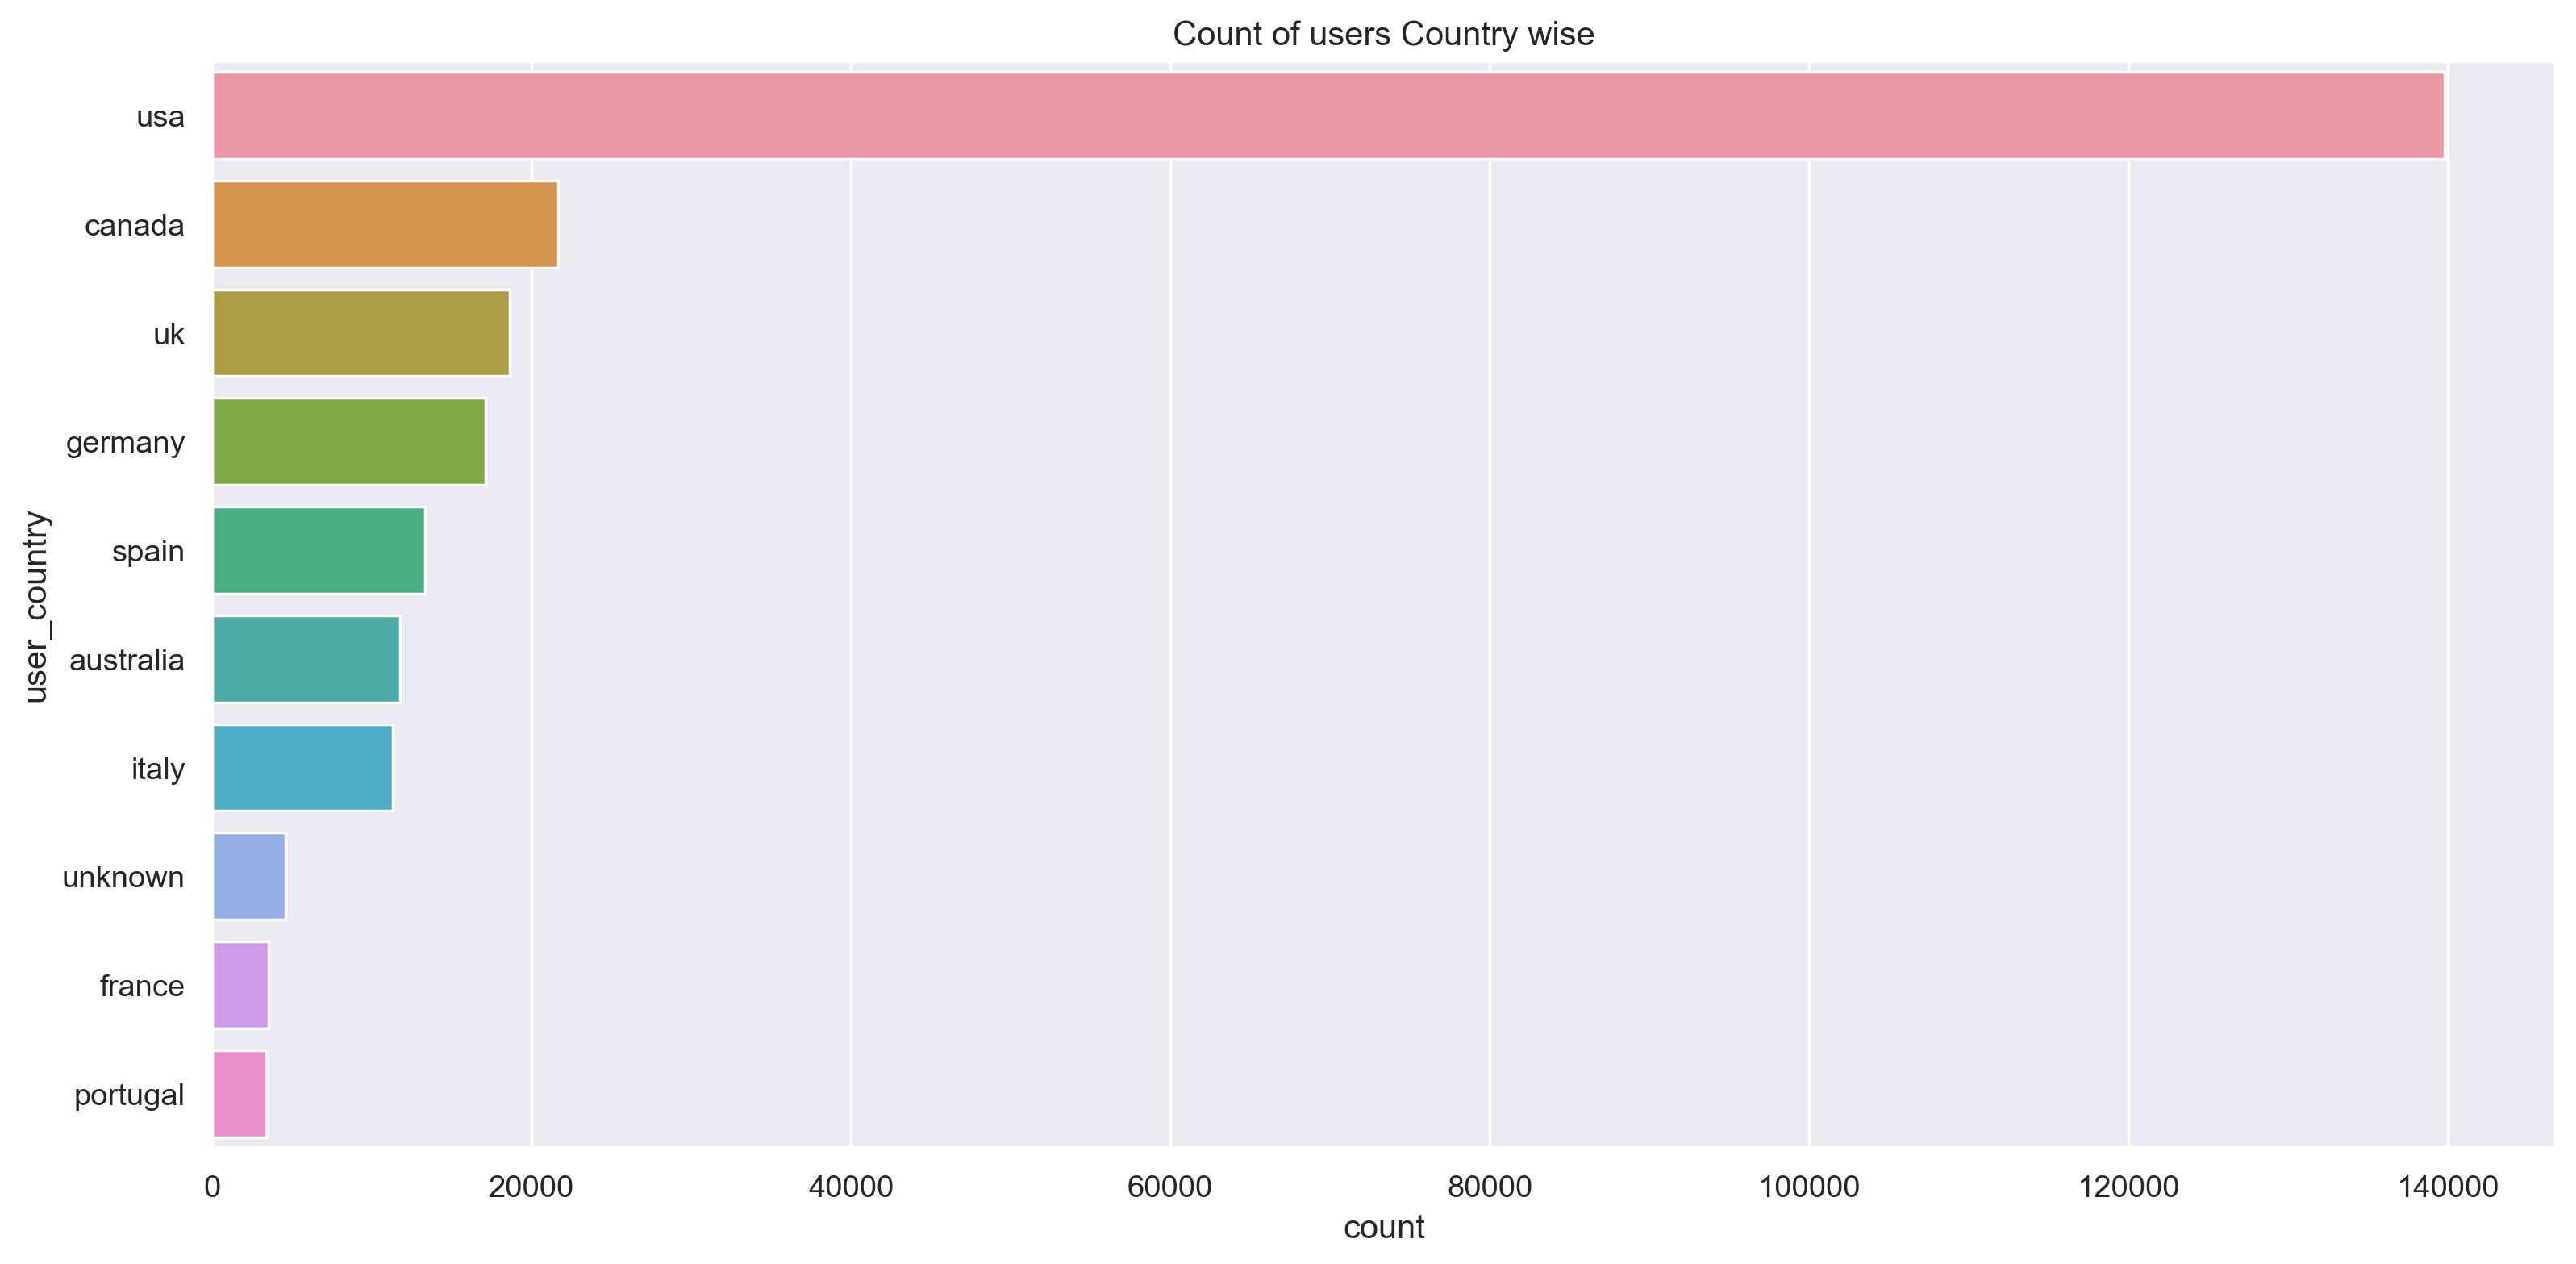

In [71]:
plt.figure(figsize=(15,7))
sns.countplot(y='user_country',data=df_users,order=pd.value_counts(df_users['user_country']).iloc[:10].index)
plt.title('Count of users Country wise')

In [72]:
#Most number of users are from USA

In [73]:
#Let's treat outliers in users age

Text(0.5, 1.0, 'Age Distribution Plot')

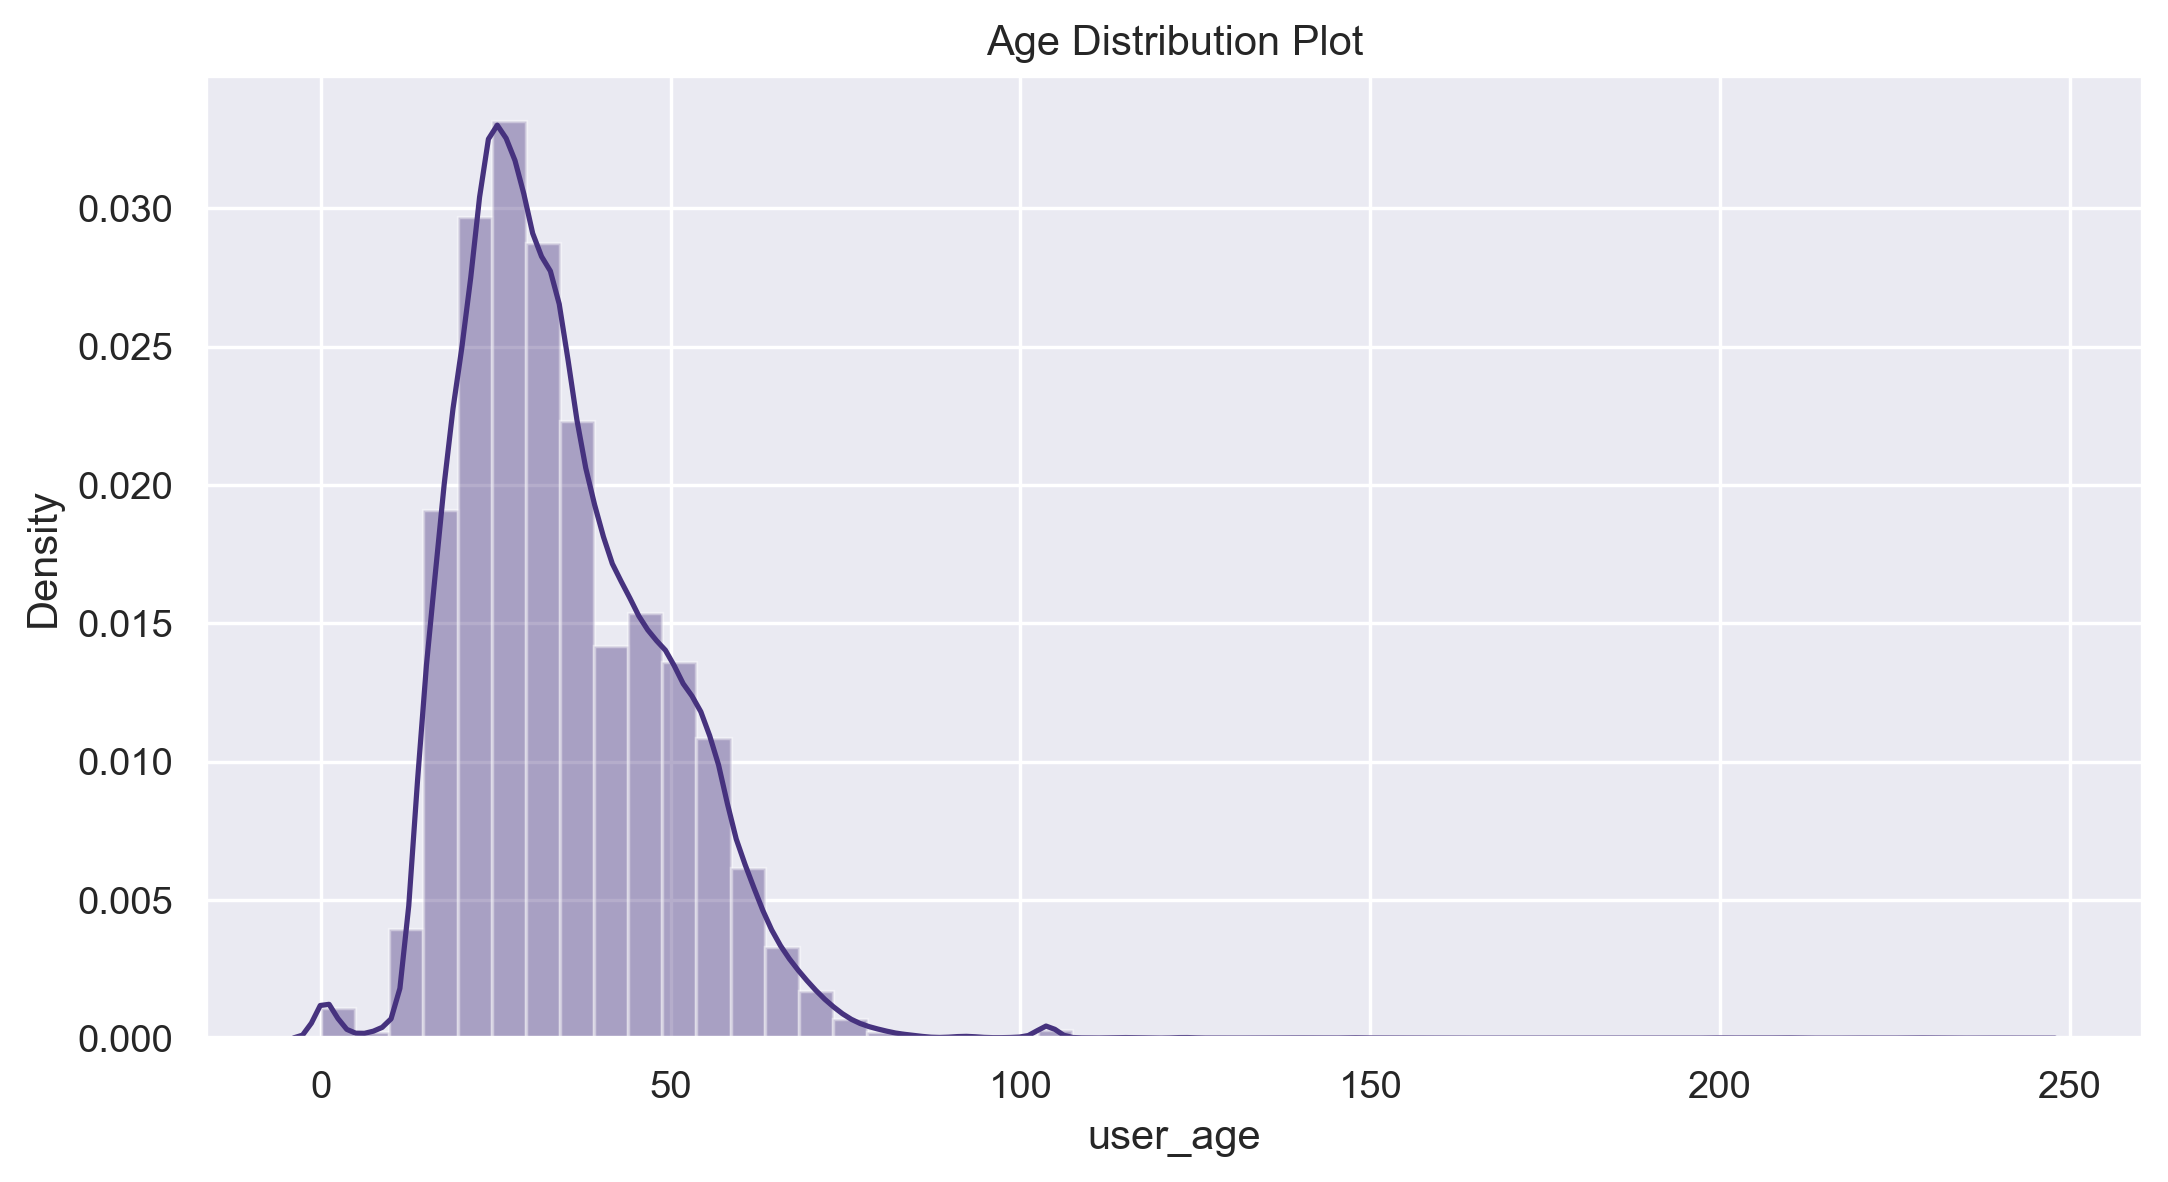

In [74]:
sns.distplot(df_users.user_age)
plt.title('Age Distribution Plot')

In [75]:
#Age value's below 5 and above 100 do not make much sense for our book rating case.hence replacing these by NaNs

In [76]:
# outlier data became NaN
df_users.loc[(df_users.user_age > 100) | (df_users.user_age < 5), 'user_age'] = np.nan

Text(0.5, 1.0, 'Age Distribution Plot')

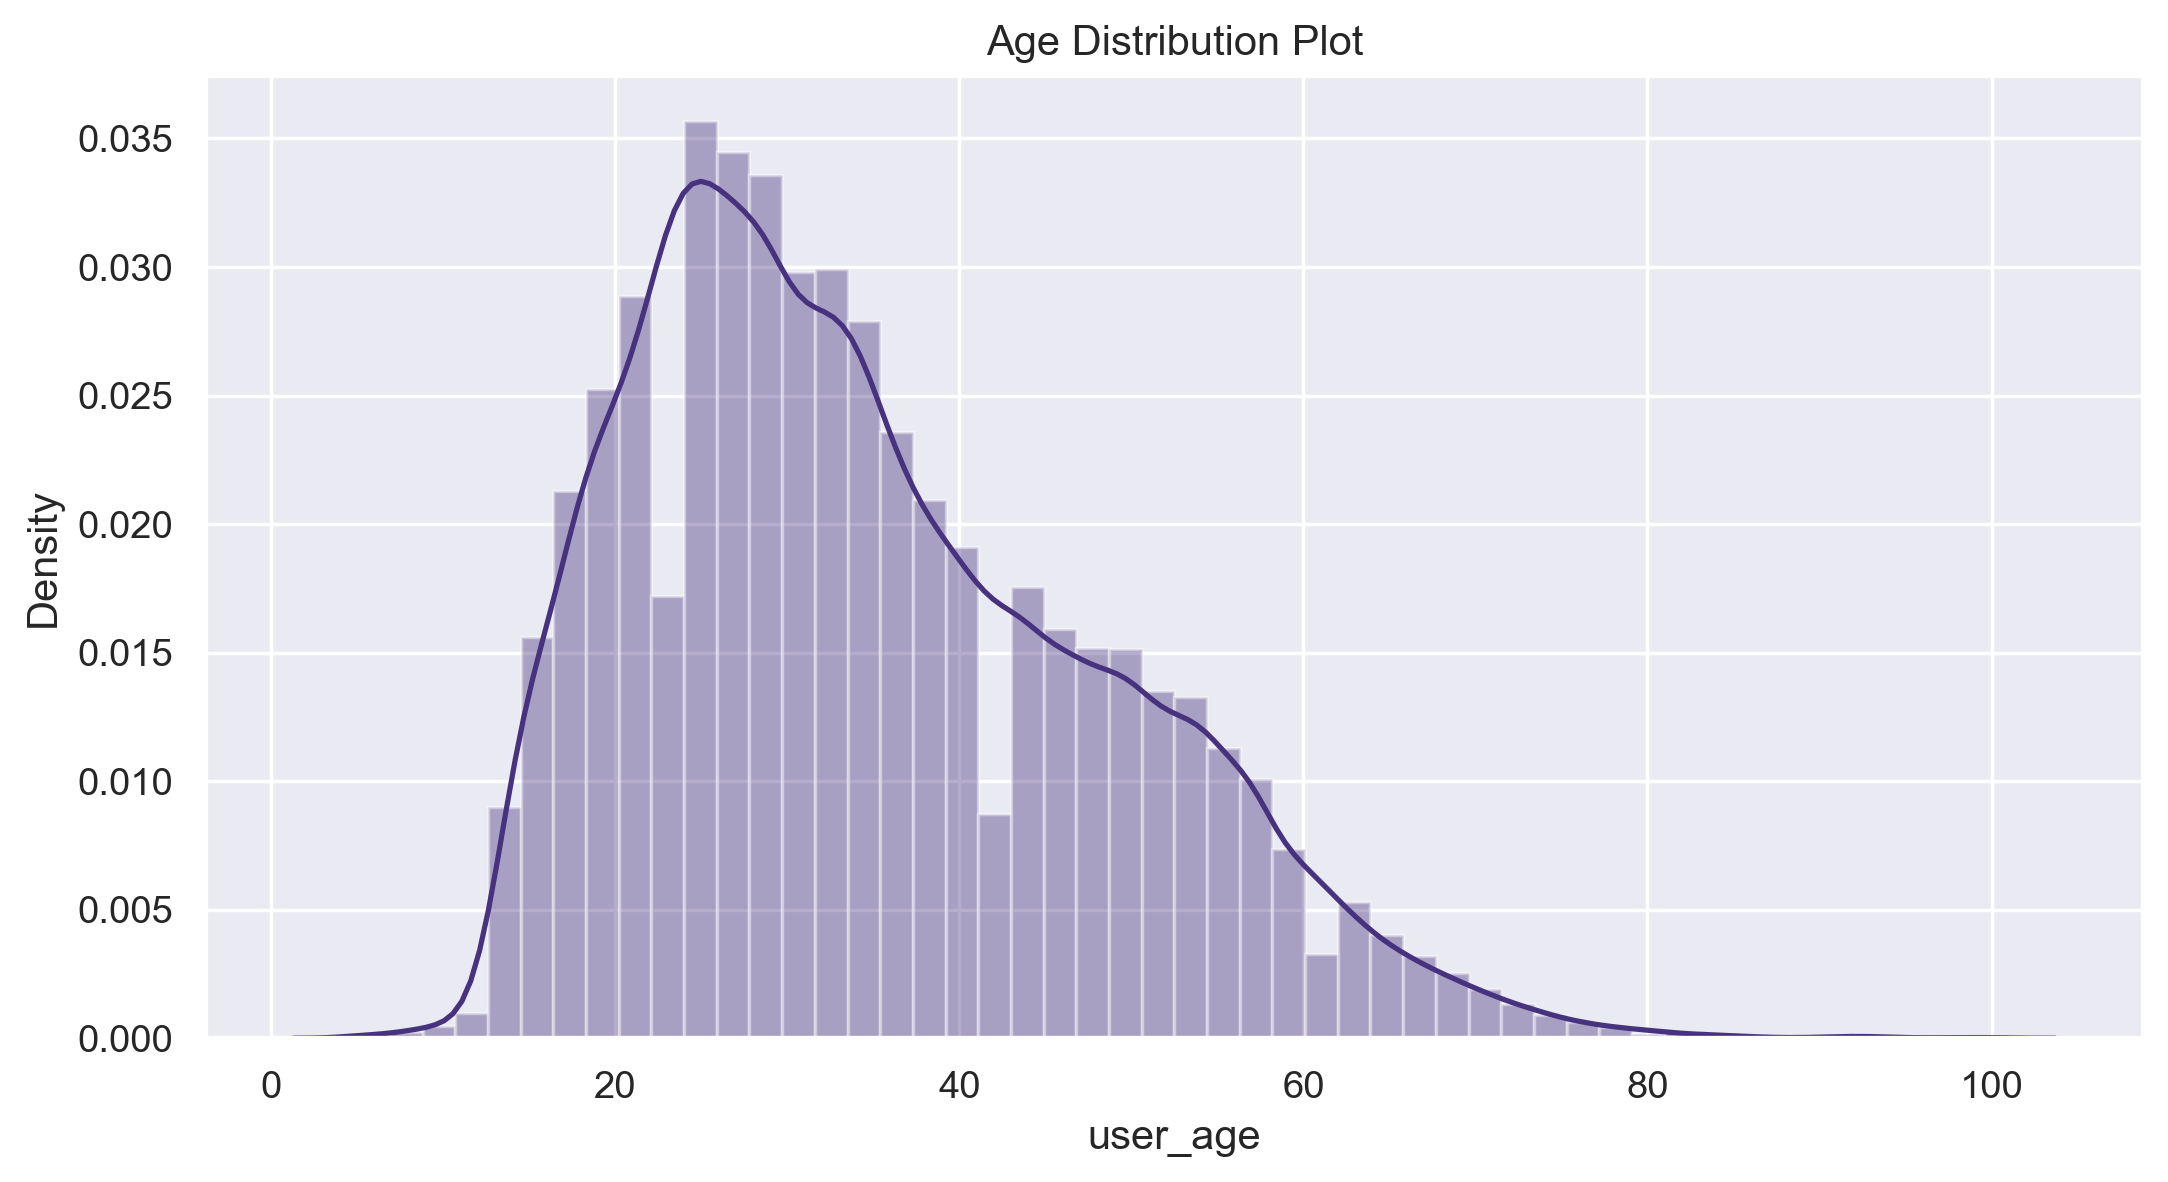

In [77]:
sns.distplot(df_users.user_age)
plt.title('Age Distribution Plot')

In [78]:
df_users.isna().sum()

User-ID              0
user_age        112010
user_country         0
dtype: int64

In [79]:
#Age has positive Skewness (right tail) so we can use median to fill Nan values, but for this we don't like to fill Nan value just for one range of age. To handle this we'll use country column to fill Nan.

In [80]:
df_users['user_age'] = df_users['user_age'].fillna(df_users.groupby('user_country')['user_age'].transform('median'))

In [81]:
df_users.isna().sum()

User-ID           0
user_age        191
user_country      0
dtype: int64

In [82]:
#Still we have 191 Nan values let's fill them with mean

Text(0.5, 1.0, 'Age Distribution Plot')

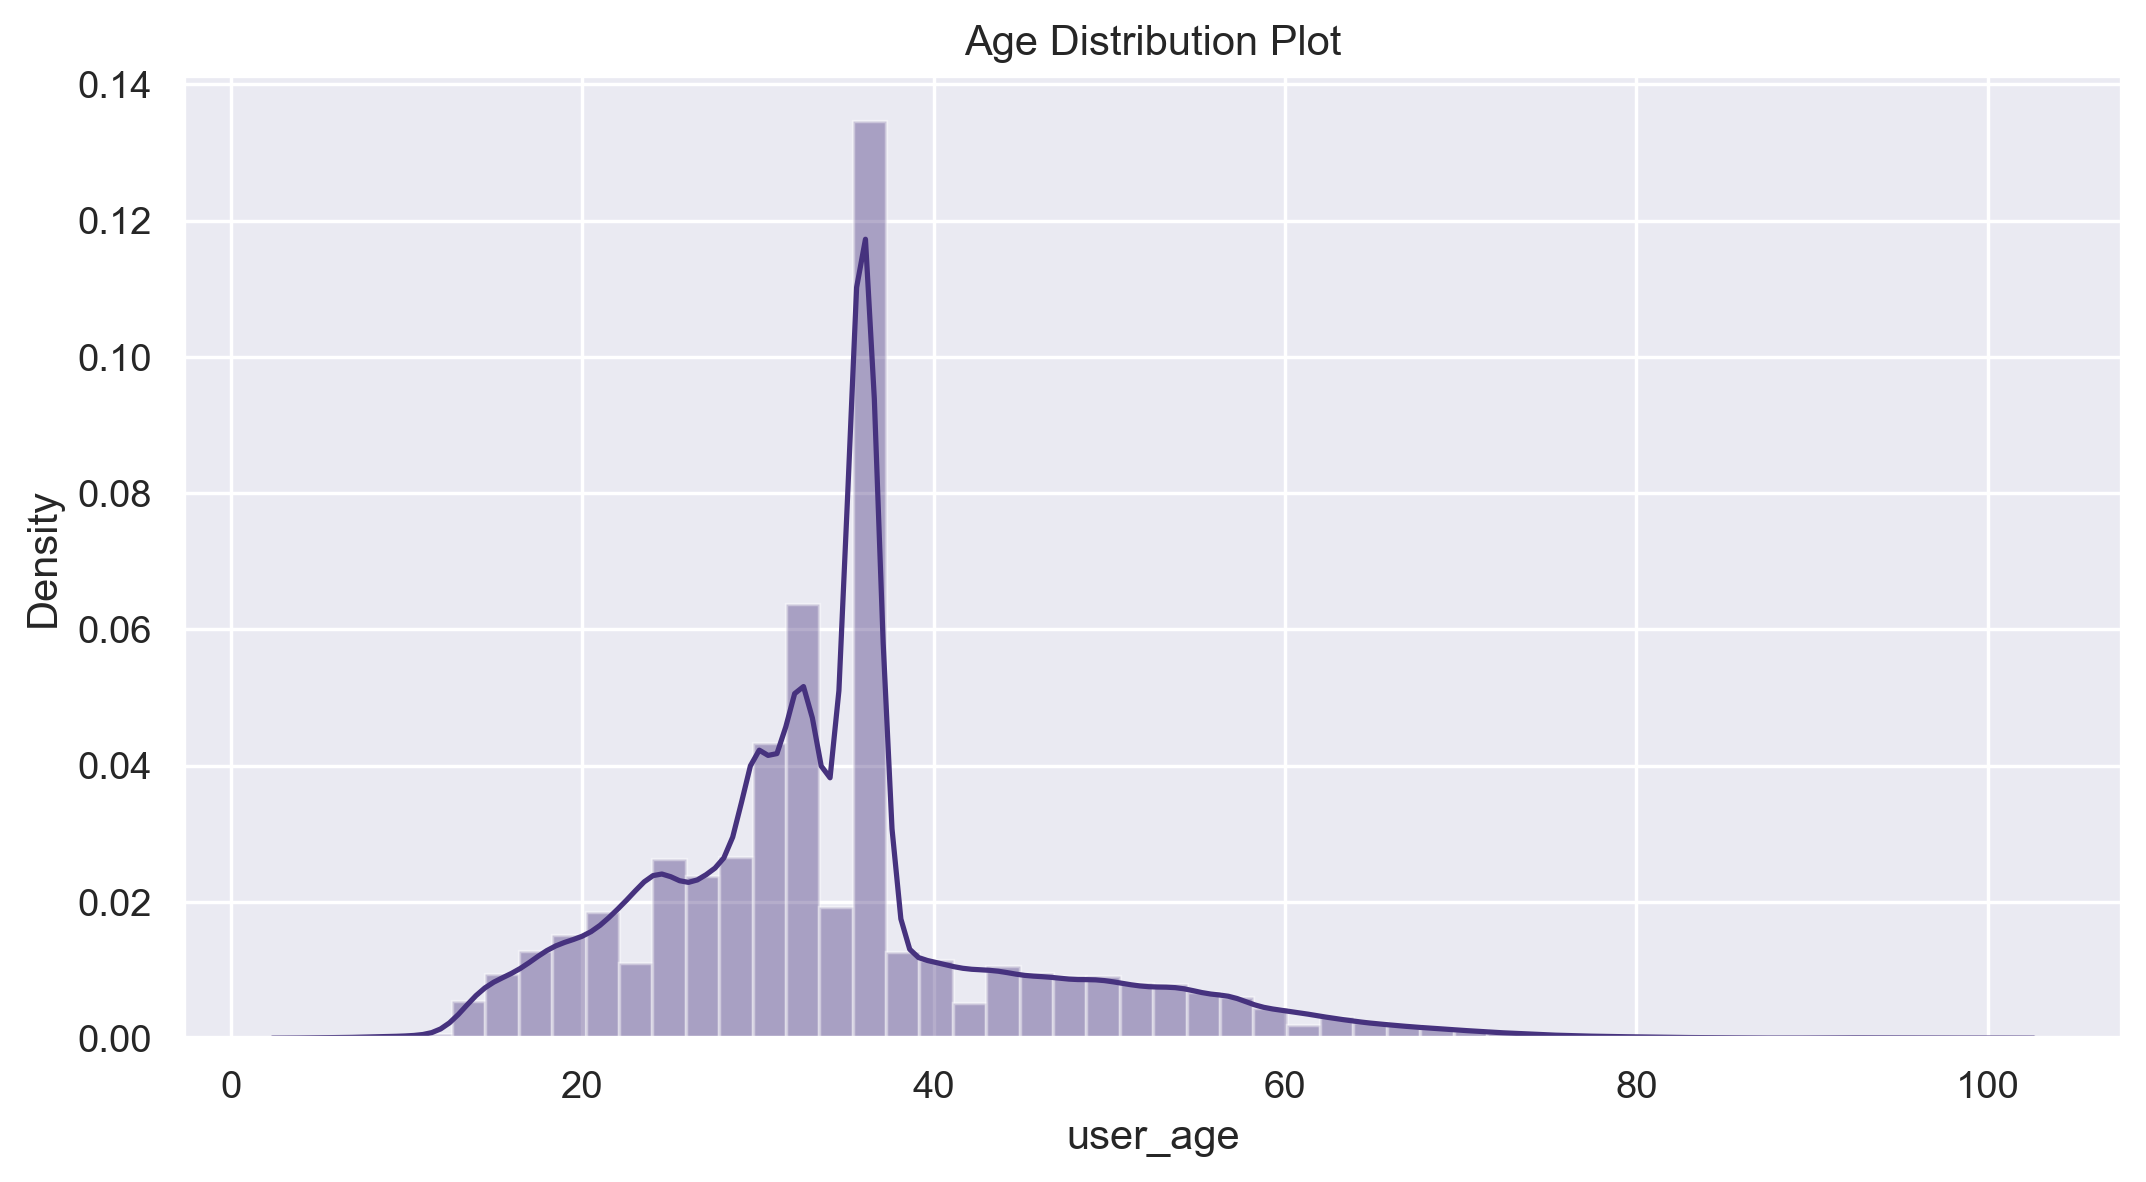

In [83]:
sns.distplot(df_users.user_age)
plt.title('Age Distribution Plot')

In [84]:
df_users['user_age'].fillna(df_users.user_age.mean(),inplace=True)

In [85]:
df_users.isna().sum()

User-ID         0
user_age        0
user_country    0
dtype: int64

<Axes: >

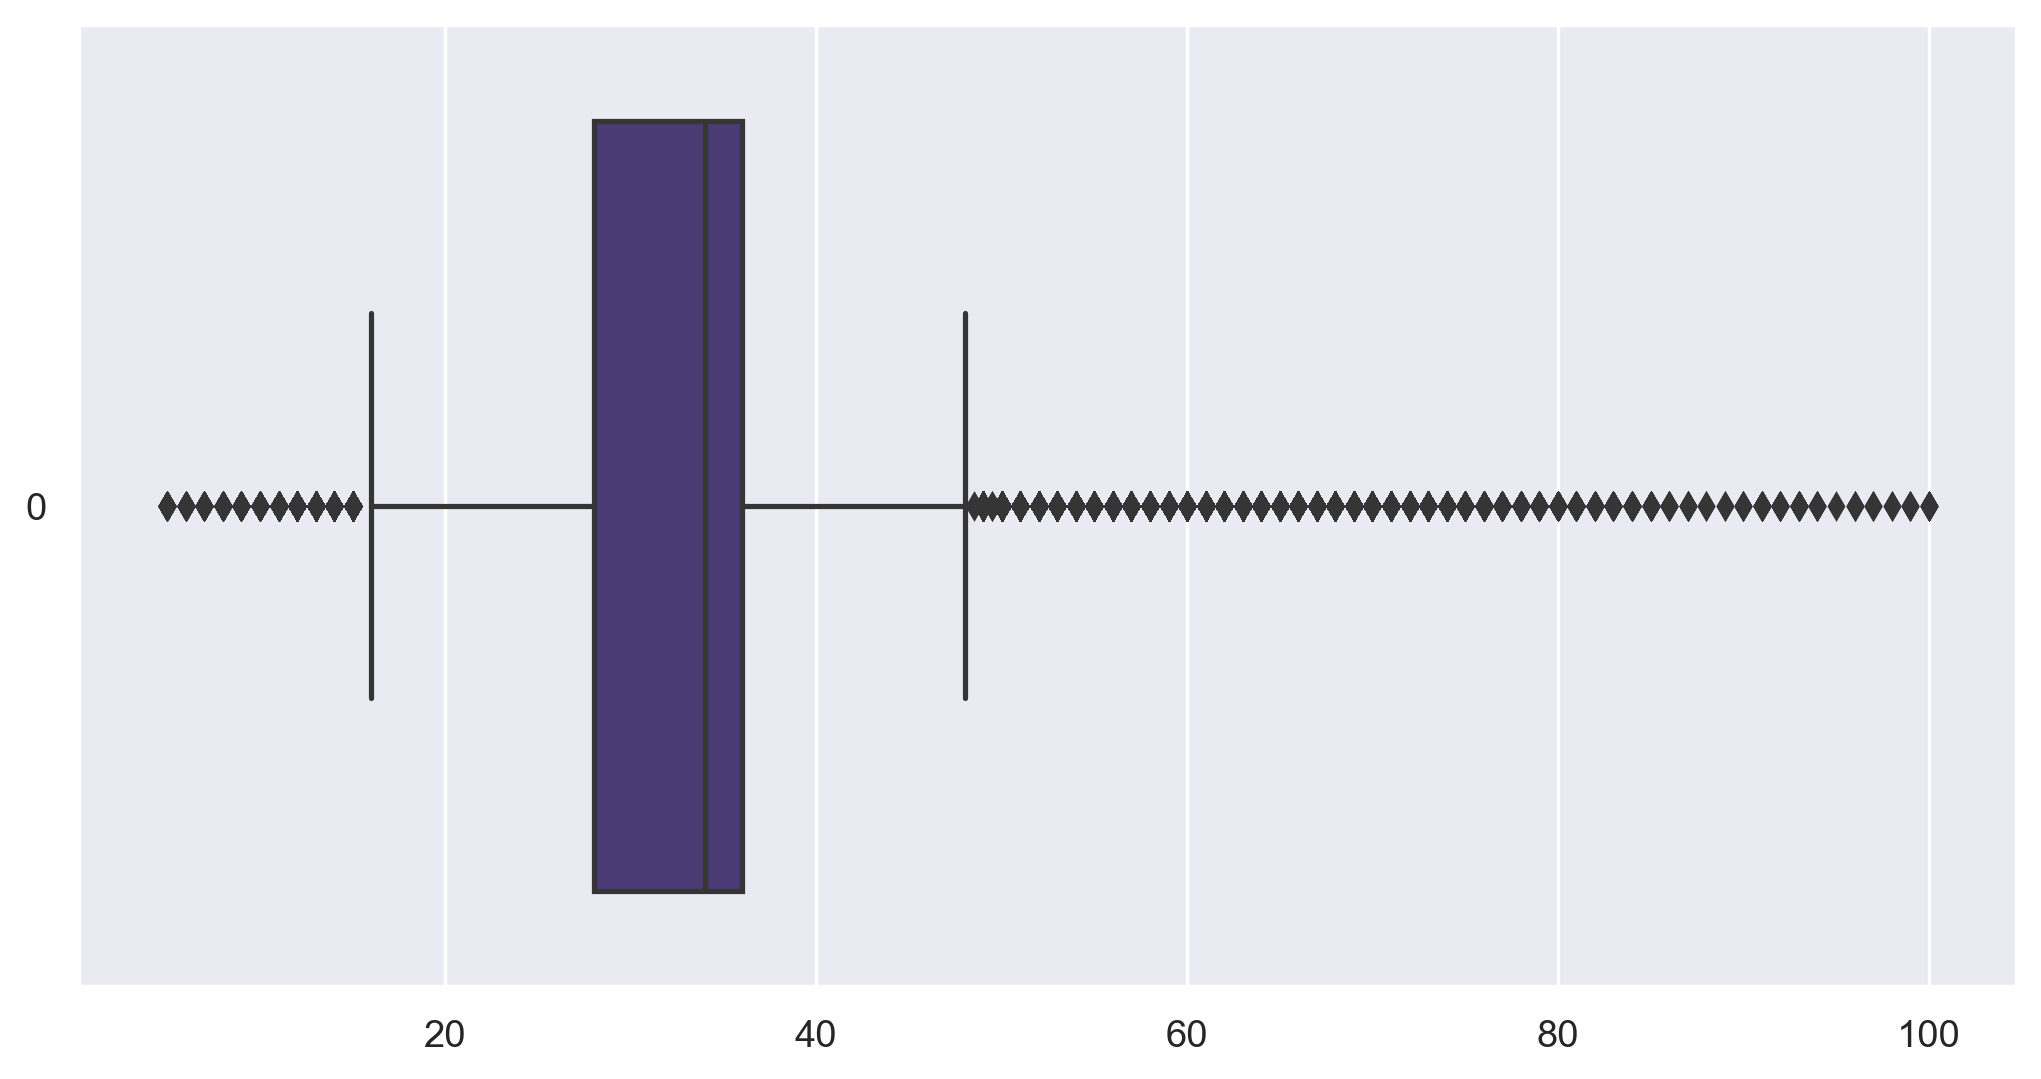

In [86]:
sns.boxplot(df_users['user_age'],orient='h') 

Text(0.5, 1.0, 'Age Distribution Plot')

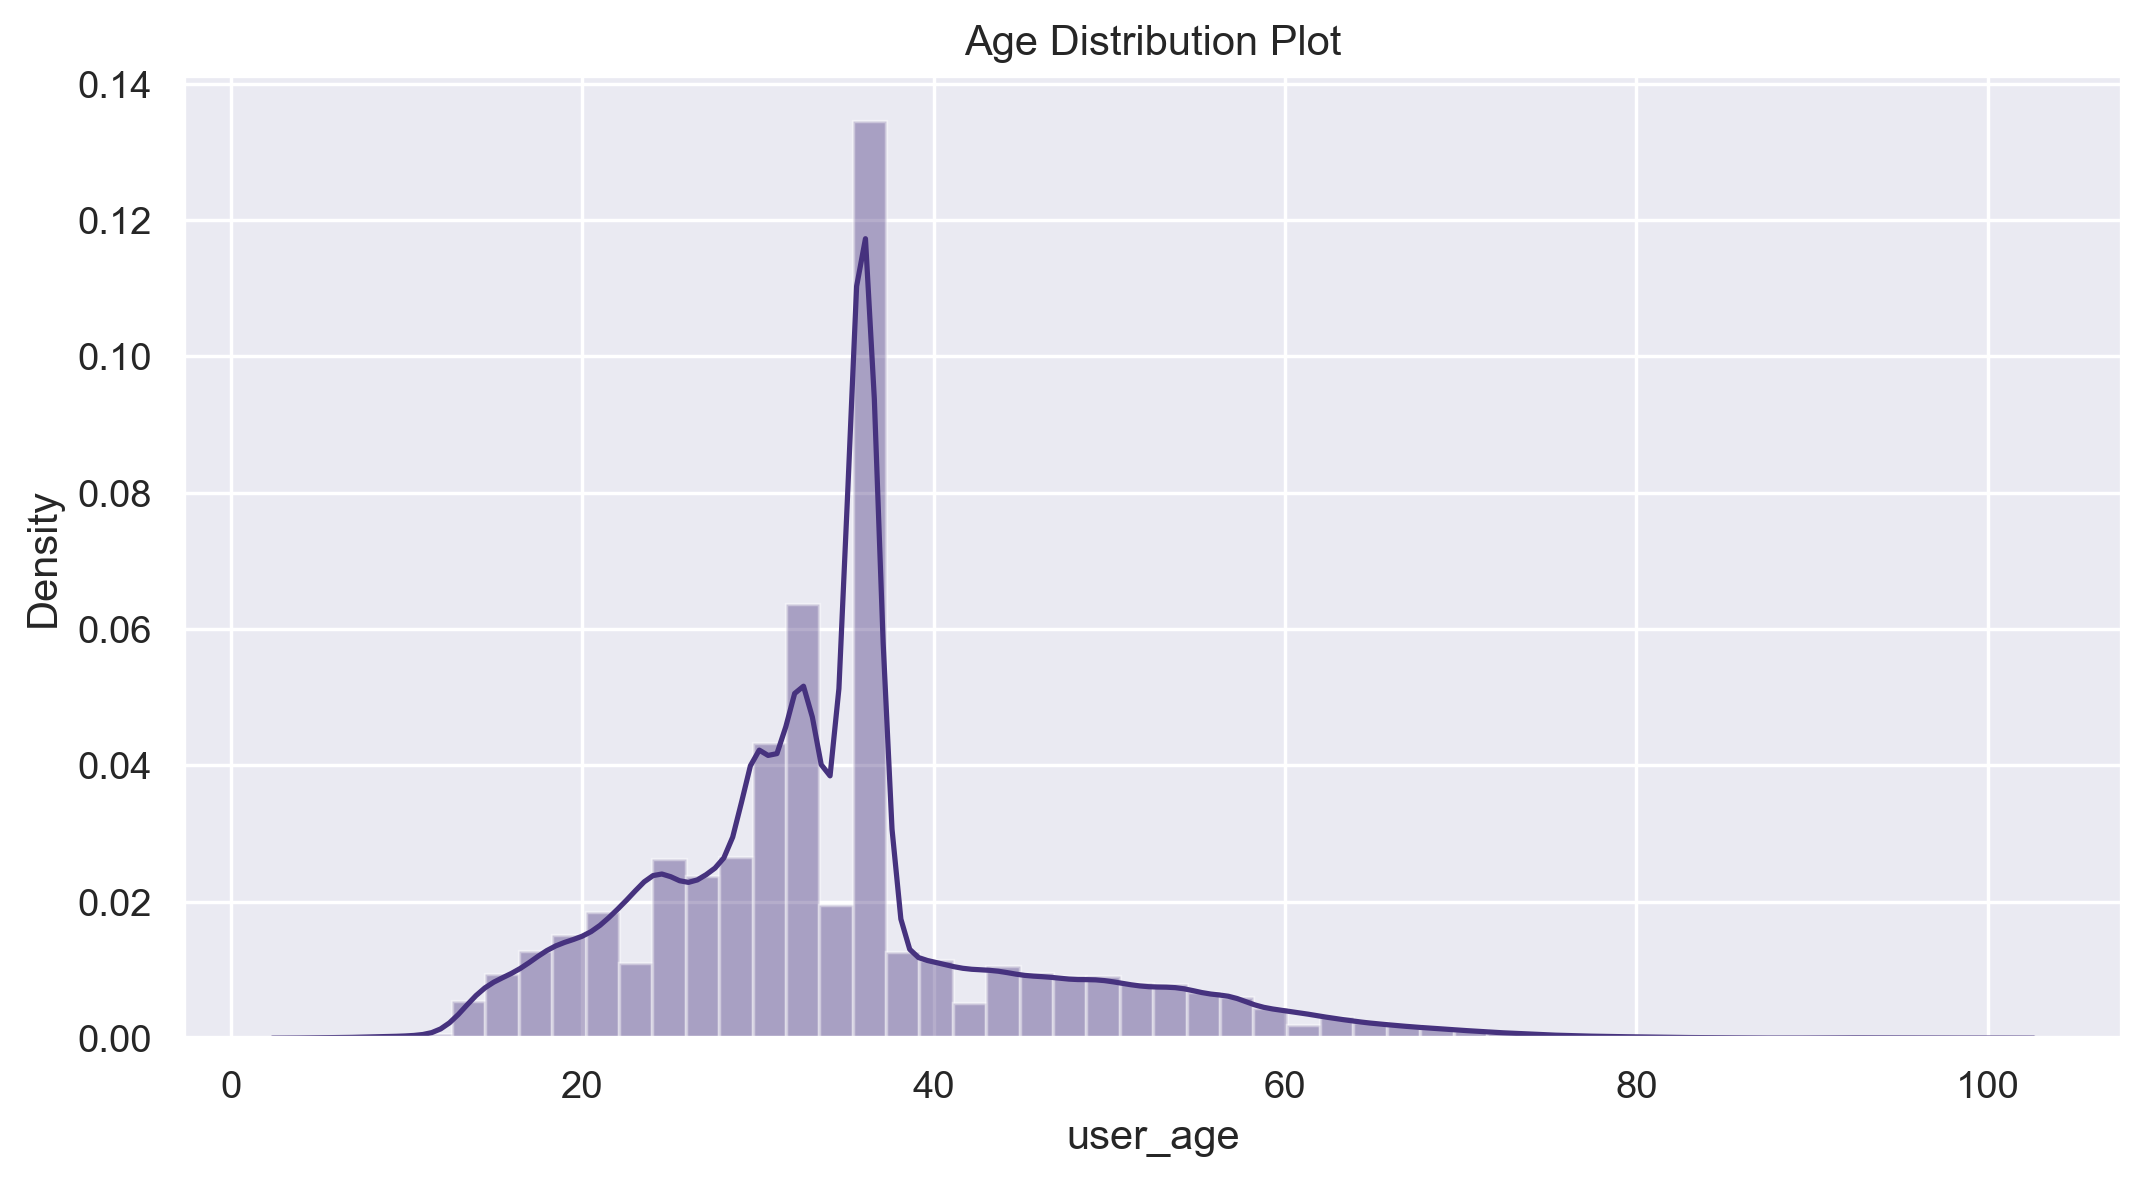

In [87]:
sns.distplot(df_users.user_age)
plt.title('Age Distribution Plot')

In [ ]:
#model building

In [88]:
print(df_ratings.shape)
print(df_users.shape)
print(df_books.shape)

(1149780, 3)
(278858, 3)
(271360, 6)


In [89]:
print(df_ratings.dtypes)
print(df_users.dtypes)
print(df_books.dtypes)

User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object
User-ID           int64
user_age        float64
user_country     object
dtype: object
ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication     int64
Publisher              object
Image-URL-L            object
dtype: object


In [90]:
df_ratings['User-ID'].value_counts()

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: User-ID, Length: 105283, dtype: int64

In [91]:
df_ratings['User-ID'].unique().shape

(105283,)

In [92]:
users_who_rated_more_than_200_books=df_ratings['User-ID'].value_counts() > 200

In [93]:
users_who_rated_more_than_200_books[users_who_rated_more_than_200_books].shape

(899,)

In [94]:
user_index_200=users_who_rated_more_than_200_books[users_who_rated_more_than_200_books].index

In [95]:
user_index_200

Int64Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352,
            110973, 235105,
            ...
            260183,  73681,  44296, 155916,   9856, 274808,  28634,  59727,
            268622, 188951],
           dtype='int64', length=899)

In [96]:
ratings=df_ratings[df_ratings['User-ID'].isin(user_index_200)]

In [97]:
ratings.head()

,User-ID,ISBN,Book-Rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0


In [98]:
ratings.shape

(526356, 3)

In [99]:
df_books.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...


In [100]:
# merging books and ratings data sets 

In [101]:
rating_with_books=ratings.merge(df_books,on='ISBN')

In [102]:
rating_with_books #books which are rated more than 200 times

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
...,...,...,...,...,...,...,...,...
487666,275970,1892145022,0,Here Is New York,E. B. White,1999,Little Bookroom,http://images.amazon.com/images/P/1892145022.0...
487667,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),http://images.amazon.com/images/P/1931868123.0...
487668,275970,3411086211,10,Die Biene.,Sybil GrÃ?Â¤fin SchÃ?Â¶nfeldt,1993,"Bibliographisches Institut, Mannheim",http://images.amazon.com/images/P/3411086211.0...
487669,275970,3829021860,0,The Penis Book,Joseph Cohen,1999,Konemann,http://images.amazon.com/images/P/3829021860.0...


In [103]:
num_rating=rating_with_books.groupby('Book-Title')['Book-Rating'].count().reset_index()

In [104]:
num_rating

,Book-Title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1
...,...,...
160264,Ã?Â?ber die Pflicht zum Ungehorsam gegen den S...,3
160265,Ã?Â?lpiraten.,1
160266,Ã?Â?rger mit Produkt X. Roman.,1
160267,Ã?Â?stlich der Berge.,1


In [105]:
num_rating.rename(columns={'Book-Rating':'num_of_rating'},inplace=True)

In [106]:
num_rating

,Book-Title,num_of_rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1
...,...,...
160264,Ã?Â?ber die Pflicht zum Ungehorsam gegen den S...,3
160265,Ã?Â?lpiraten.,1
160266,Ã?Â?rger mit Produkt X. Roman.,1
160267,Ã?Â?stlich der Berge.,1


In [108]:
final_rating=rating_with_books.merge(num_rating,on='Book-Title')

In [109]:
final_rating.head(2)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82


In [110]:
final_rating.shape

(487671, 9)

In [112]:
final_rating=final_rating[final_rating['num_of_rating']>=50]#books who are rated more than or equal to 50 times

In [114]:
final_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82


In [113]:
final_rating.shape

(61853, 9)

In [115]:
final_rating.sample(10)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,num_of_rating
32562,36836,0425083837,0,The Hunt for Red October,Tom Clancy,1985,Berkley Publishing Group,http://images.amazon.com/images/P/0425083837.0...,101
126006,230522,0440224624,6,The Loop,Nicholas Evans,1999,Dell Publishing Company,http://images.amazon.com/images/P/0440224624.0...,72
60130,224138,0446605484,0,Roses Are Red (Alex Cross Novels),James Patterson,2001,Warner Vision,http://images.amazon.com/images/P/0446605484.0...,92
7718,11676,0440241073,8,The Summons,John Grisham,2002,Dell Publishing Company,http://images.amazon.com/images/P/0440241073.0...,171
62318,78783,0805063897,9,Nickel and Dimed: On (Not) Getting By in America,Barbara Ehrenreich,2002,Owl Books,http://images.amazon.com/images/P/0805063897.0...,112
219393,185384,0671867156,0,Pretend You Don't See Her,Mary Higgins Clark,1998,Pocket,http://images.amazon.com/images/P/0671867156.0...,105
66334,208406,0345370775,9,Jurassic Park,Michael Crichton,1999,Ballantine Books,http://images.amazon.com/images/P/0345370775.0...,175
147358,124487,0345402871,0,Airframe,Michael Crichton,1997,Ballantine Books,http://images.amazon.com/images/P/0345402871.0...,103
39858,172742,0451172817,0,Needful Things,Stephen King,2004,Signet Book,http://images.amazon.com/images/P/0451172817.0...,80
6522,274061,0439136350,0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...,138


In [118]:
final_rating.drop_duplicates(['User-ID','Book-Title'],inplace=True)

In [119]:
final_rating.shape

(59850, 9)

In [120]:
final_rating

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
...,...,...,...,...,...,...,...,...,...
236701,255489,0553579983,7,And Then You Die,Iris Johansen,1998,Bantam,http://images.amazon.com/images/P/0553579983.0...,50
236702,256407,0553579983,0,And Then You Die,Iris Johansen,1998,Bantam,http://images.amazon.com/images/P/0553579983.0...,50
236703,257204,0553579983,0,And Then You Die,Iris Johansen,1998,Bantam,http://images.amazon.com/images/P/0553579983.0...,50
236704,261829,0553579983,0,And Then You Die,Iris Johansen,1998,Bantam,http://images.amazon.com/images/P/0553579983.0...,50


In [122]:
book_pivot=final_rating.pivot_table(columns='User-ID',index='Book-Title',values='Book-Rating')

In [123]:
book_pivot

User-ID,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 Charing Cross Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [124]:
book_pivot.fillna(0,inplace=True)

In [125]:
book_pivot

User-ID,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [126]:
from scipy.sparse import csr_matrix

In [127]:
books_sparse = csr_matrix(book_pivot)#this will ignore zeros and compress the file this will help while calculating clusters
books_sparse

<742x888 sparse matrix of type '<class 'numpy.float64'>'
	with 14942 stored elements in Compressed Sparse Row format>

In [ ]:
#clustering model

In [128]:
from sklearn.neighbors import NearestNeighbors
model=NearestNeighbors(algorithm='brute')

In [129]:
model.fit(books_sparse)

NearestNeighbors(algorithm='brute')

In [130]:
distance,suggestion=model.kneighbors(book_pivot.iloc[237,:].values.reshape(1,-1),n_neighbors=6)

In [131]:
distance

array([[ 0.        , 68.78953409, 69.5413546 , 72.64296249, 76.83098333,
        77.28518616]])

In [132]:
suggestion

array([[237, 240, 238, 241, 184, 536]], dtype=int64)

In [133]:
for i in range(len(suggestion)):
    print(book_pivot.index[suggestion[i]])

Index(['Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Sorcerer's Stone (Book 1)', 'Exclusive',
       'The Cradle Will Fall'],
      dtype='object', name='Book-Title')


In [134]:
book_pivot.index[3]

'4 Blondes'

In [142]:
book_pivot.index

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       '84 Charing Cross Road', 'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Cry In The Night',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=742)

In [136]:
book_name=book_pivot.index

In [137]:
import pickle
pickle.dump(model,open('new_deployment/model.pkl','wb'))
pickle.dump(book_name,open('new_deployment/book_name.pkl','wb'))
pickle.dump(final_rating,open('new_deployment/final_rating.pkl','wb'))
pickle.dump(book_pivot,open('new_deployment/book_pivot.pkl','wb'))

In [138]:
np.where(book_pivot.index == '1984')

(array([0], dtype=int64),)

In [139]:
np.where(book_pivot.index == '1984')[0]

array([0], dtype=int64)

In [140]:
np.where(book_pivot.index == '1984')[0][0]

0

In [141]:
def recommend_books(book_name):
    book_id=np.where(book_pivot.index == book_name)[0][0]
    distance,suggestion=model.kneighbors(book_pivot.iloc[book_id,:].values.reshape(1,-1),n_neighbors=6)
    
    for i in range(len(suggestion)):
        books = book_pivot.index[suggestion[i]]
        for j in books:
            print(j)

In [143]:
book_name='A Case of Need'
recommend_books(book_name)

A Case of Need
Exclusive
Jacob Have I Loved
Pleading Guilty
No Safe Place
The Cradle Will Fall


In [144]:
book_name='Harry Potter and the Prisoner of Azkaban (Book 3)'
recommend_books(book_name)

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Chamber of Secrets (Book 2)
Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Order of the Phoenix (Book 5)
Exclusive
